In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
from tqdm.notebook import tqdm

In [2]:
class PlayingCardDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data = ImageFolder(data_dir, transform=transform) #each sub folder as one class
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]

    @property
    def classes(self):
        return self.data.classes

In [3]:
dataset = PlayingCardDataset(
    data_dir='/kaggle/input/cards-image-datasetclassification/train'
)

6


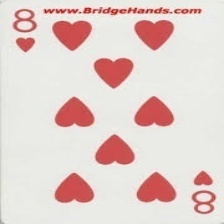

In [4]:
image, label = dataset[1000]
print(label)
image

In [5]:
print(dataset.data.classes)

['ace of clubs', 'ace of diamonds', 'ace of hearts', 'ace of spades', 'eight of clubs', 'eight of diamonds', 'eight of hearts', 'eight of spades', 'five of clubs', 'five of diamonds', 'five of hearts', 'five of spades', 'four of clubs', 'four of diamonds', 'four of hearts', 'four of spades', 'jack of clubs', 'jack of diamonds', 'jack of hearts', 'jack of spades', 'joker', 'king of clubs', 'king of diamonds', 'king of hearts', 'king of spades', 'nine of clubs', 'nine of diamonds', 'nine of hearts', 'nine of spades', 'queen of clubs', 'queen of diamonds', 'queen of hearts', 'queen of spades', 'seven of clubs', 'seven of diamonds', 'seven of hearts', 'seven of spades', 'six of clubs', 'six of diamonds', 'six of hearts', 'six of spades', 'ten of clubs', 'ten of diamonds', 'ten of hearts', 'ten of spades', 'three of clubs', 'three of diamonds', 'three of hearts', 'three of spades', 'two of clubs', 'two of diamonds', 'two of hearts', 'two of spades']


In [6]:
data_dir = '/kaggle/input/cards-image-datasetclassification/train'
target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

In [7]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

data_dir = '/kaggle/input/cards-image-datasetclassification/train'
dataset = PlayingCardDataset(data_dir, transform)

In [8]:
image, label = dataset[100]
image.shape

torch.Size([3, 128, 128])

In [9]:
for image, label in dataset:
    break

In [10]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [11]:
for images, labels in dataloader:
    break

In [12]:
images.shape, labels.shape


(torch.Size([32, 3, 128, 128]), torch.Size([32]))

In [13]:
labels

tensor([51, 38, 22, 29, 44, 27,  4, 48, 27, 15, 47, 33, 41, 14, 28, 14, 10,  3,
         0, 11, 41,  3, 49, 49, 48, 47, 40, 37,  5, 23,  9, 12])

# Pytorch Model

In [14]:
class SimpleCardClassifer(nn.Module):
    def __init__(self, num_classes=53):
        super(SimpleCardClassifer, self).__init__()
        self.base_model = timm.create_model('efficientnet_b0', pretrained=False)
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])

        enet_out_size = 1280
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(enet_out_size, num_classes)
        )
    
    def forward(self, x):
        x = self.features(x)
        output = self.classifier(x)
        return output

In [15]:
model = SimpleCardClassifer(num_classes=53)
print(str(model)[:500])

SimpleCardClassifer(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=Fal


In [16]:
model(images)

tensor([[ 0.0304, -0.0221,  0.0497,  ...,  0.0292,  0.1436, -0.0681],
        [ 0.0583, -0.0149,  0.0082,  ...,  0.0539,  0.1574, -0.0293],
        [-0.0061,  0.0738,  0.0022,  ..., -0.0243,  0.0937, -0.1085],
        ...,
        [ 0.2107,  0.2906, -0.5465,  ..., -1.0078, -0.5439,  0.6145],
        [-0.0238,  0.0686,  0.0037,  ..., -0.0109,  0.1059, -0.0457],
        [ 0.0167,  0.1075,  0.0174,  ..., -0.0495,  0.1378, -0.0478]],
       grad_fn=<AddmmBackward0>)

In [17]:
example_out = model(images)
example_out.shape

torch.Size([32, 53])

# Training

In [18]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

train_folder = '../input/cards-image-datasetclassification/train/'
valid_folder = '../input/cards-image-datasetclassification/valid/'
test_folder = '../input/cards-image-datasetclassification/test/'

train_dataset = PlayingCardDataset(train_folder, transform=transform)
val_dataset = PlayingCardDataset(valid_folder, transform=transform)
test_dataset = PlayingCardDataset(test_folder, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [25]:
num_epochs = 5
train_losses, val_losses = [], []

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = SimpleCardClassifer(num_classes=53)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

best_val_loss = float("inf")  # ✅ Initialize with infinity

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc='Training loop'):
        # Move inputs and labels to the device
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * labels.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)
    
    # Validation phase
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc='Validation loop'):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)
    val_loss = running_loss / len(val_loader.dataset)
    val_losses.append(val_loss)
    
    print(f"Epoch {epoch+1}/{num_epochs} - Train loss: {train_loss}, Validation loss: {val_loss}")
    
    # ✅ Save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_model.pth")
        print(f"✅ Best model saved at epoch {epoch+1} with val_loss: {val_loss:.4f}")


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 1/5 - Train loss: 3.30331898436091, Validation loss: 2.1998206925841997
✅ Best model saved at epoch 1 with val_loss: 2.1998


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 2/5 - Train loss: 2.2323175364751506, Validation loss: 1.6813302251527895
✅ Best model saved at epoch 2 with val_loss: 1.6813


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 3/5 - Train loss: 1.7722308137859653, Validation loss: 1.266112585337657
✅ Best model saved at epoch 3 with val_loss: 1.2661


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 4/5 - Train loss: 1.3901745662609153, Validation loss: 1.0478257755063616
✅ Best model saved at epoch 4 with val_loss: 1.0478


Training loop:   0%|          | 0/239 [00:00<?, ?it/s]

Validation loop:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch 5/5 - Train loss: 1.0738918531103625, Validation loss: 1.1198100377928535


# Losses

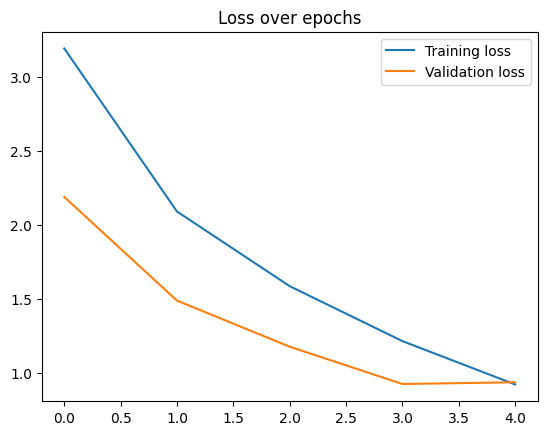

In [20]:
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.title("Loss over epochs")
plt.show()

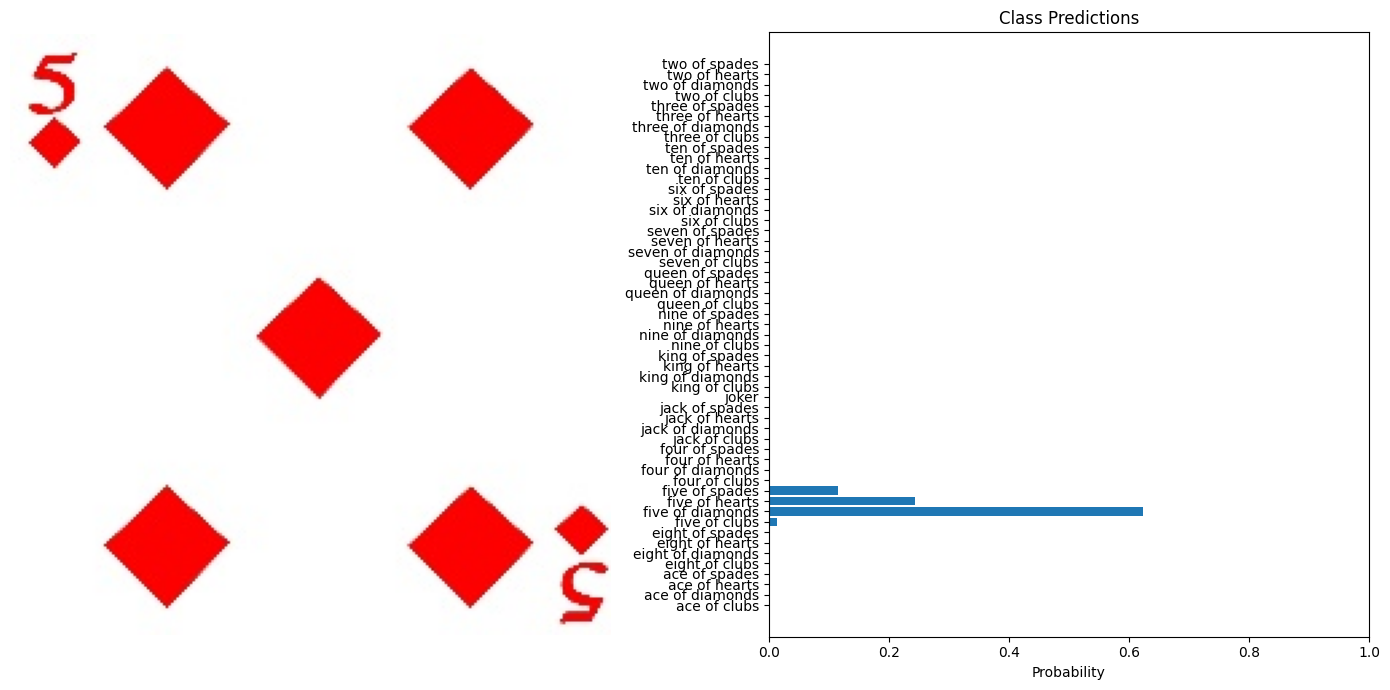

Predicted: five of diamonds  (Confidence: 0.62)


In [26]:
# Load the best model first
best_model = SimpleCardClassifer(num_classes=53)
best_model.load_state_dict(torch.load("best_model.pth", map_location=device))
best_model.to(device)

# Run prediction
test_image = "/kaggle/input/cards-image-datasetclassification/test/five of diamonds/2.jpg"
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

original_image, image_tensor = preprocess_image(test_image, transform)
probabilities = predict(best_model, image_tensor, device)

# Get class names (from dataset)
class_names = dataset.classes  

# Visualize
visualize_predictions(original_image, probabilities, class_names)

# Print top prediction
predicted_idx = np.argmax(probabilities)
print(f"Predicted: {class_names[predicted_idx]}  (Confidence: {probabilities[predicted_idx]:.2f})")


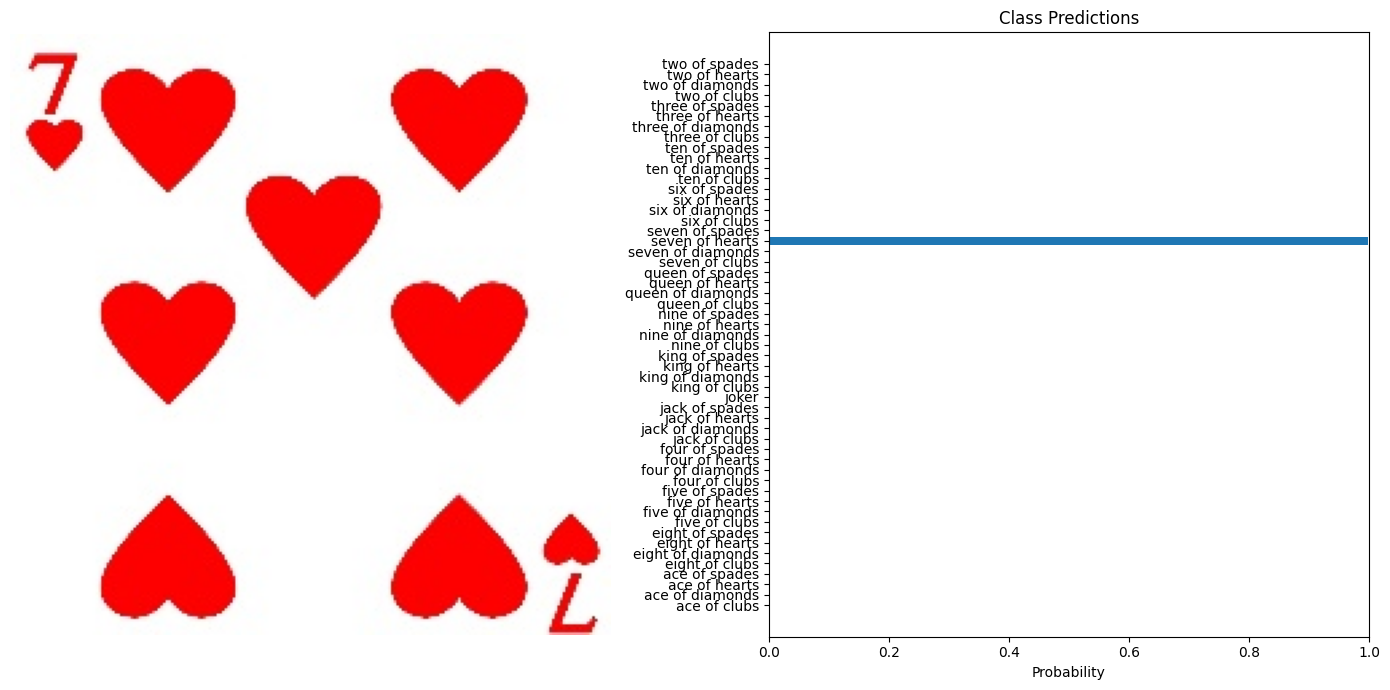

Predicted: seven of hearts  (Confidence: 1.00)


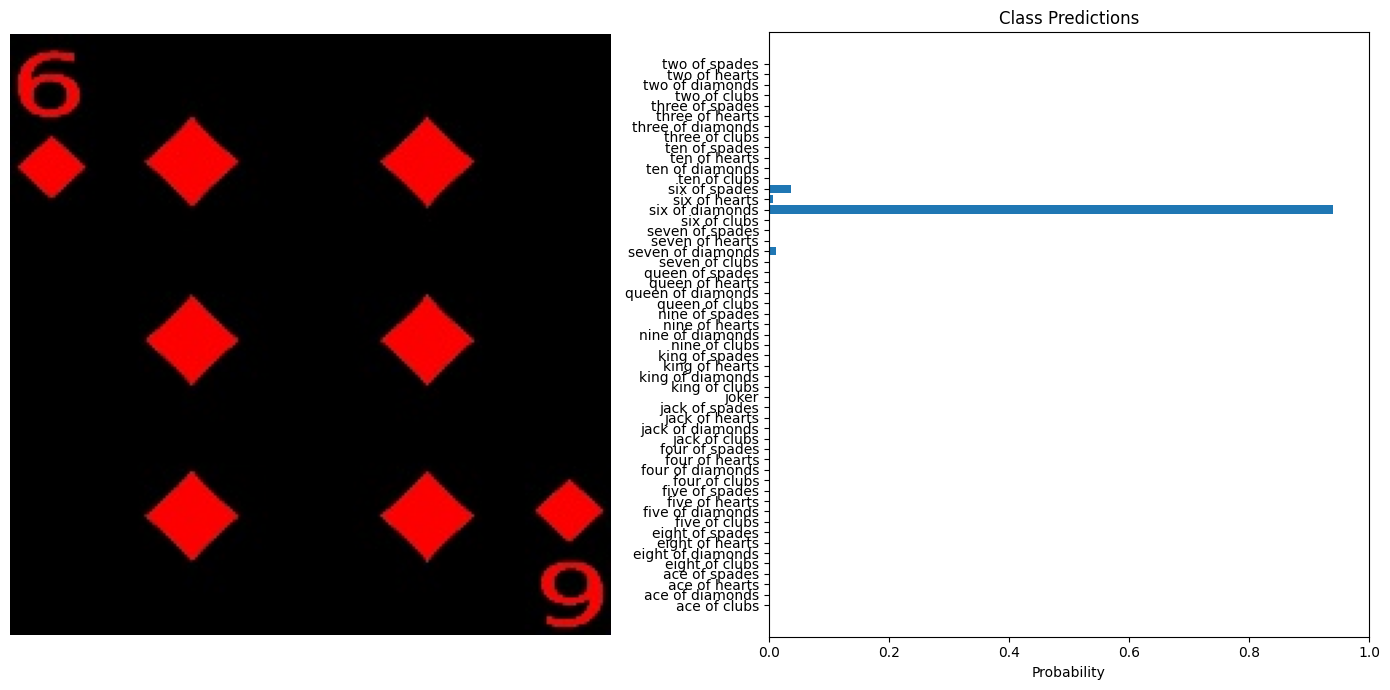

Predicted: six of diamonds  (Confidence: 0.94)


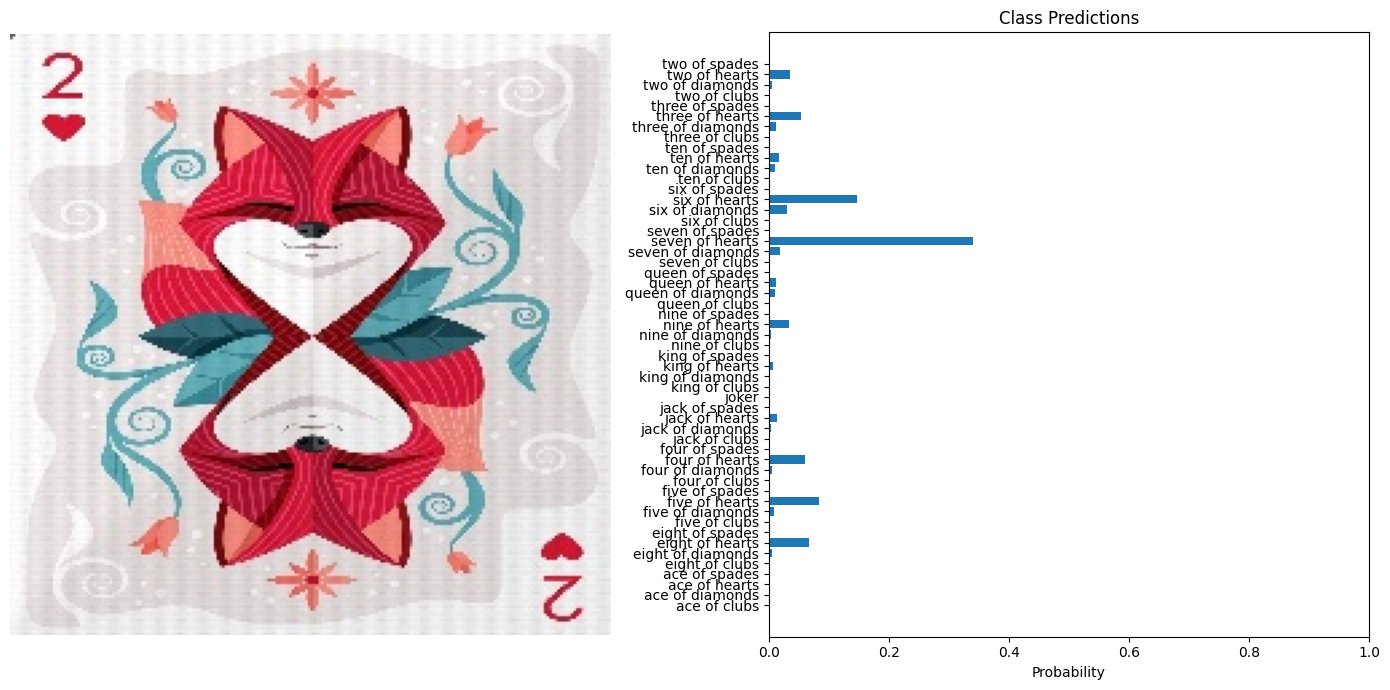

Predicted: seven of hearts  (Confidence: 0.34)


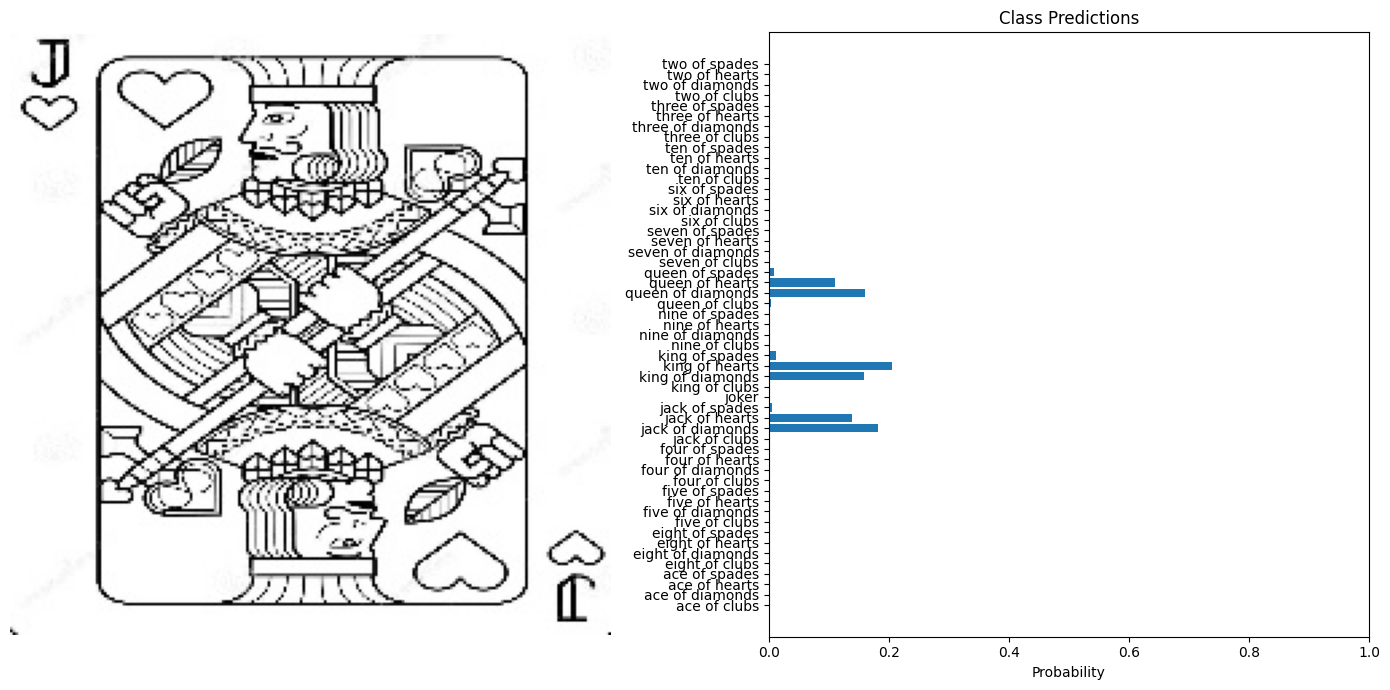

Predicted: king of hearts  (Confidence: 0.21)


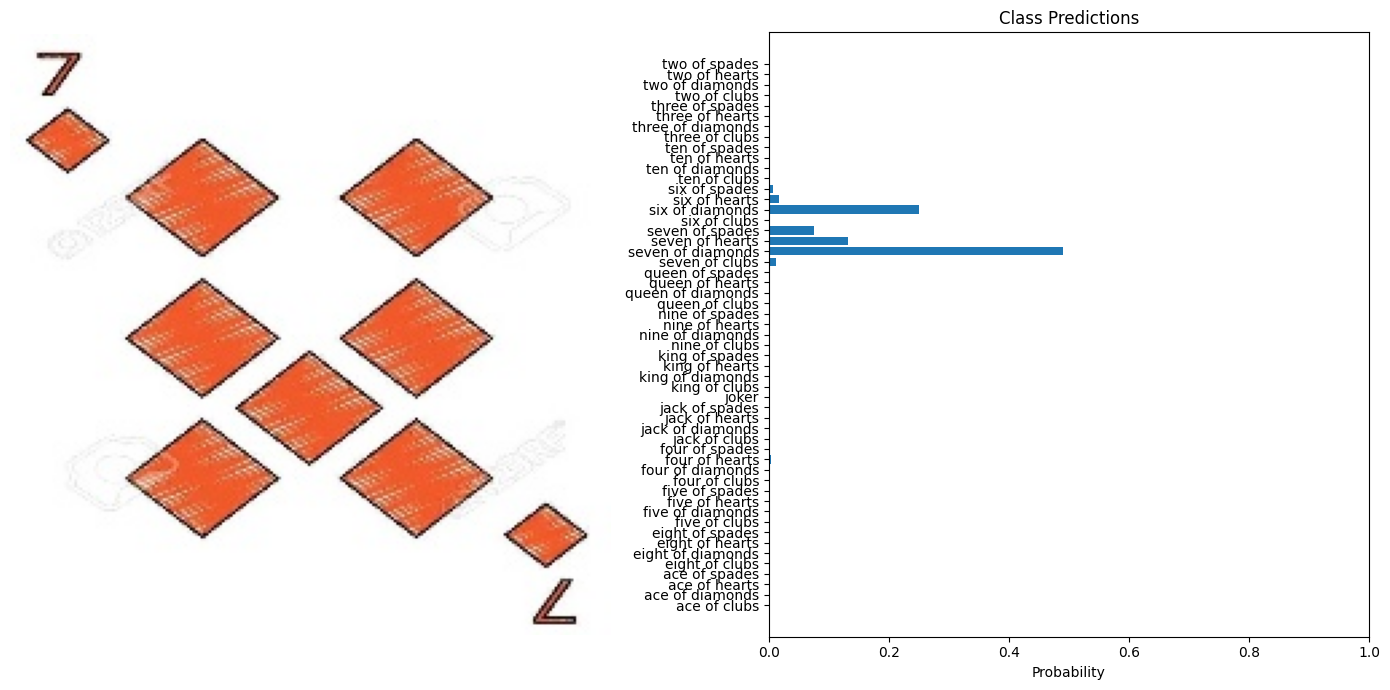

Predicted: seven of diamonds  (Confidence: 0.49)


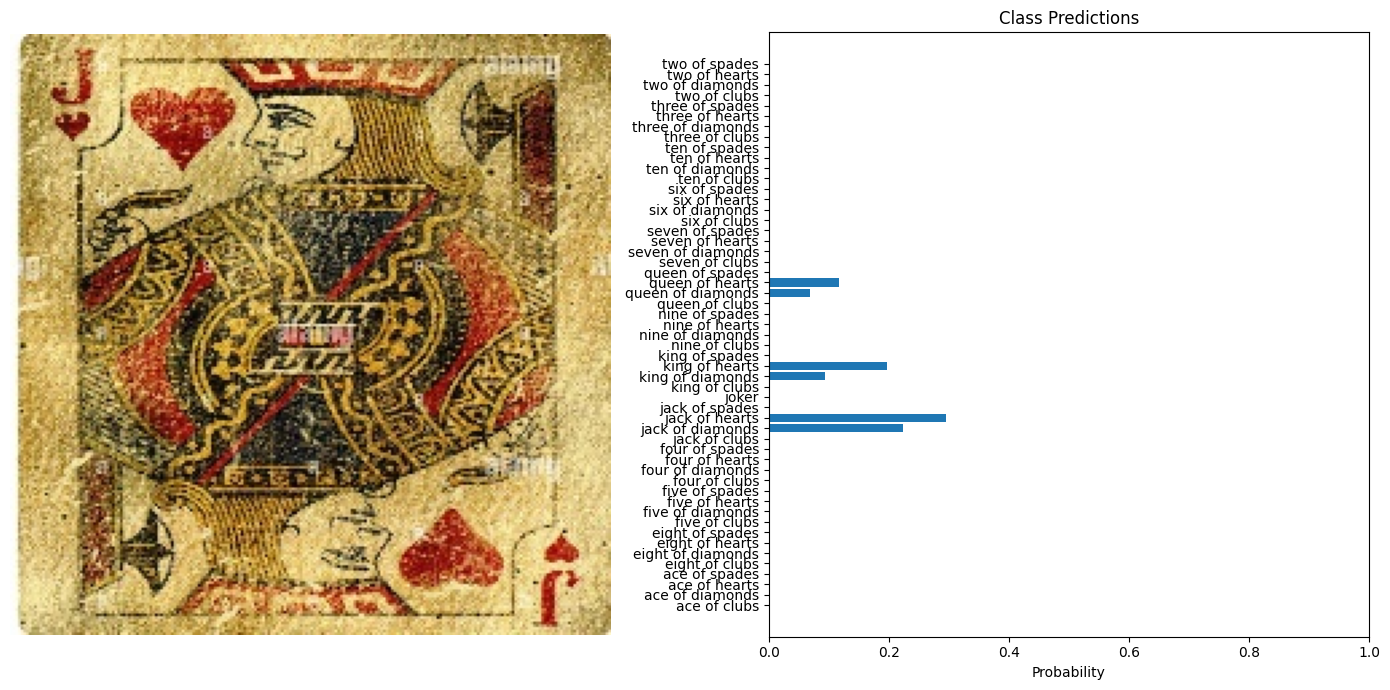

Predicted: jack of hearts  (Confidence: 0.29)


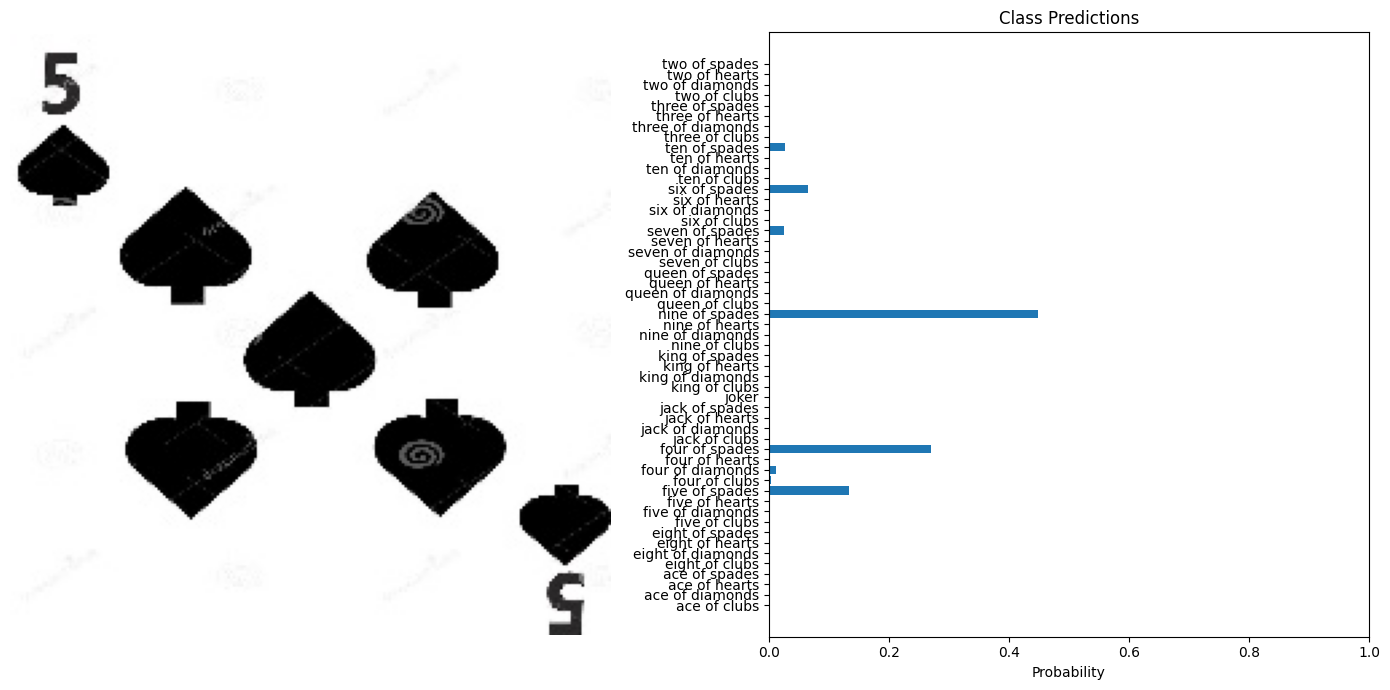

Predicted: nine of spades  (Confidence: 0.45)


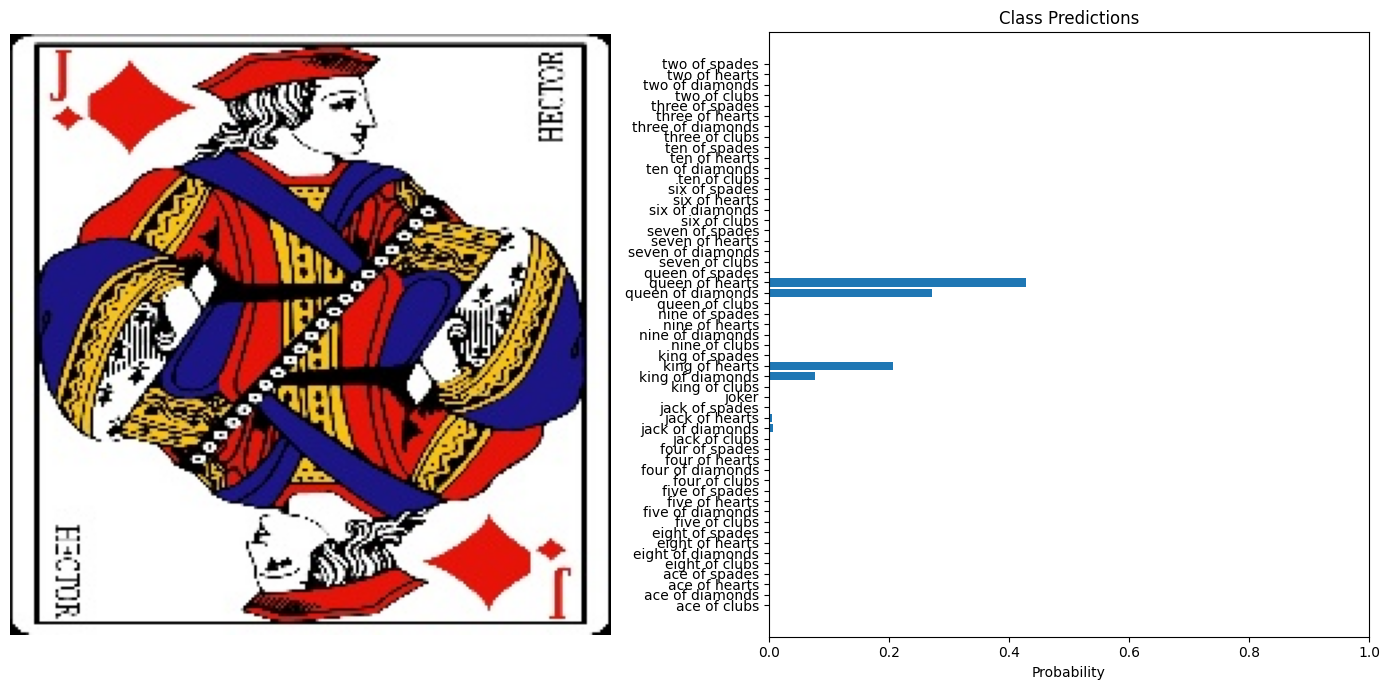

Predicted: queen of hearts  (Confidence: 0.43)


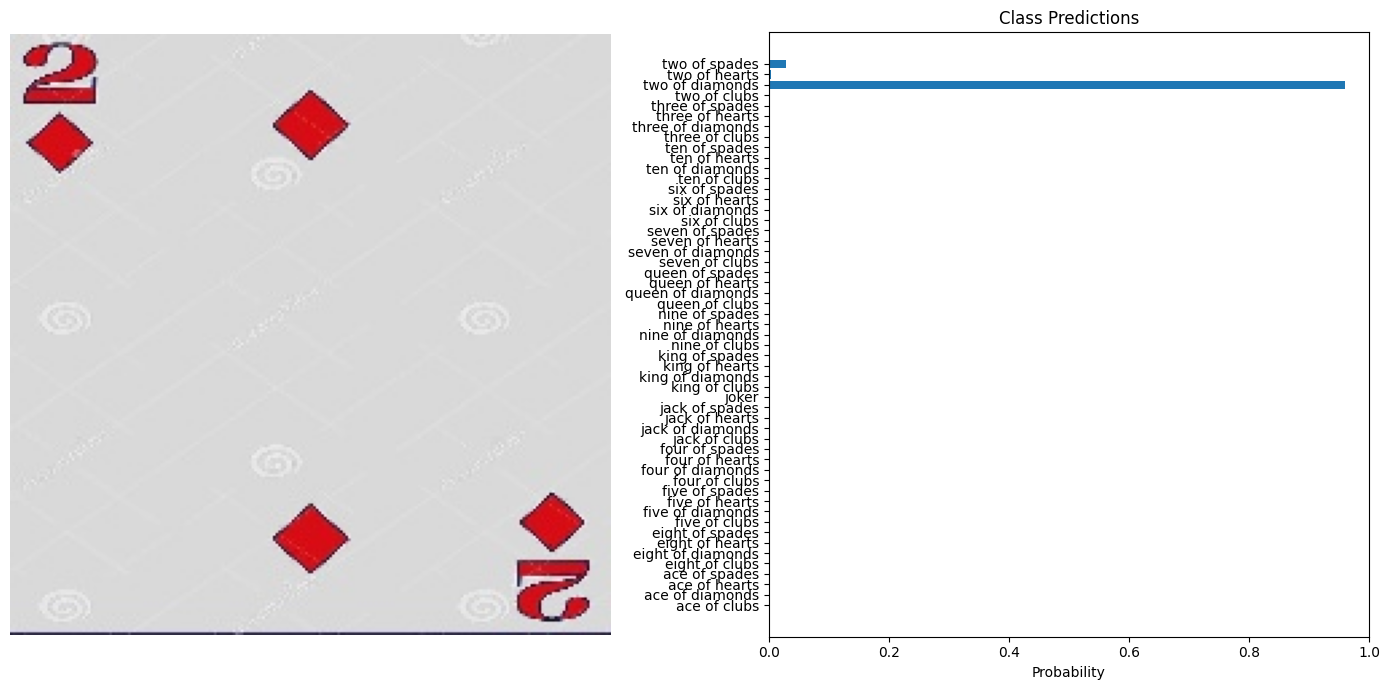

Predicted: two of diamonds  (Confidence: 0.96)


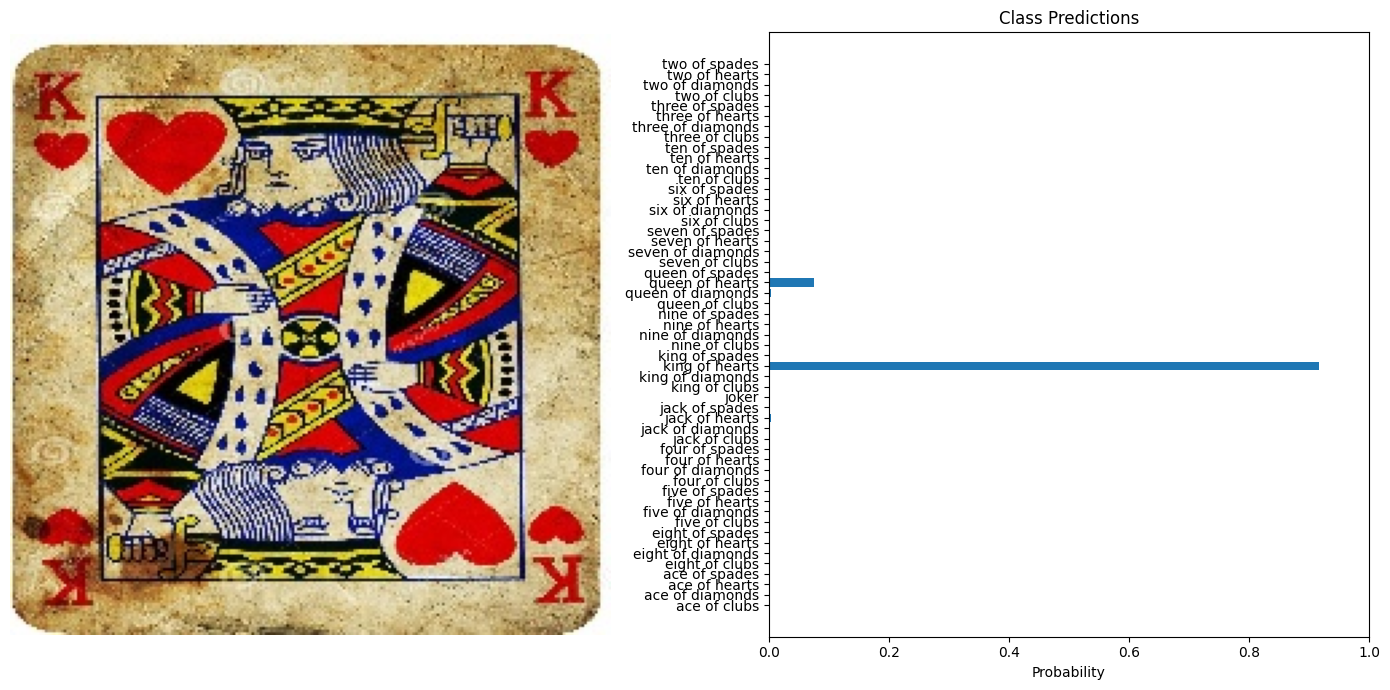

Predicted: king of hearts  (Confidence: 0.92)


In [28]:
from glob import glob
test_images = glob('../input/cards-image-datasetclassification/test/*/*')
test_examples = np.random.choice(test_images, 10)

for example in test_examples:
    original_image, image_tensor = preprocess_image(example, transform)
    
    # ✅ Use best_model, not model
    probabilities = predict(best_model, image_tensor, device)

    class_names = dataset.classes 
    visualize_predictions(original_image, probabilities, class_names)

    # Print top prediction
    predicted_idx = np.argmax(probabilities)
    print(f"Predicted: {class_names[predicted_idx]}  (Confidence: {probabilities[predicted_idx]:.2f})")


In [29]:
from torch.utils.data import DataLoader

# Create DataLoader for the entire test set
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Function to compute accuracy
def evaluate_accuracy(model, dataloader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)  # index of max probability
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

# Compute accuracy with best_model
test_accuracy = evaluate_accuracy(best_model, test_loader, device)
print(f"✅ Test Accuracy of Best Model: {test_accuracy:.2f}%")


✅ Test Accuracy of Best Model: 65.66%
